## Central Limit Theorem

We will use the same dataset(IPL)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [31]:
runs = deliveries.groupby('batsman').sum()['batsman_runs']

C:\Users\vivek\AppData\Local\Temp\ipykernel_5920\277194955.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  runs = deliveries.groupby('batsman').sum()['batsman_runs']


In [39]:
runs

array([ 280,    4,   53,   25,   62,   35,  340,   34,   19,   41,    2,
        974,    4,    5,   69,   12,  217,    9,  179,   42,   26,  123,
       3486,  120, 2069,   20,  181,   79,  724,   20,  574,    7,   10,
         49, 1604,   53,  401,  672, 3057,   36,    7,   34,   87,  339,
         12,  606,    6,  194,   49, 2416,   39,    0,   63,   87,    7,
         33,  388,   76,  280,  158,    4,  124,   35,    6,  316,    3,
       2755,  125,    4,  124,    1,   18, 1400,  193,   23,   40,   28,
        187,   15,   30,    0,  126,   21,  384,  390, 3651,  439,  521,
         98,    3,    8,   16,    8,  971,  169,   95,   46,    4,    3,
         33,  127,   10, 1563, 4014,   12,  304,  375,   21,  170, 1262,
        111,  373, 1322,   92,    1,   39,  295,   14,  121,    6,   11,
          4,    1, 1808,   19, 2385,   90,   18,  420,   13,  166,  854,
         24,   14, 1295,    4,  183, 4132,   22,  739,    4,  280,  663,
       1229,   15,  342,    2,  886,  406,  577,   

C:\Users\vivek\AppData\Local\Temp\ipykernel_5920\1329827010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(runs)


<Axes: ylabel='Density'>

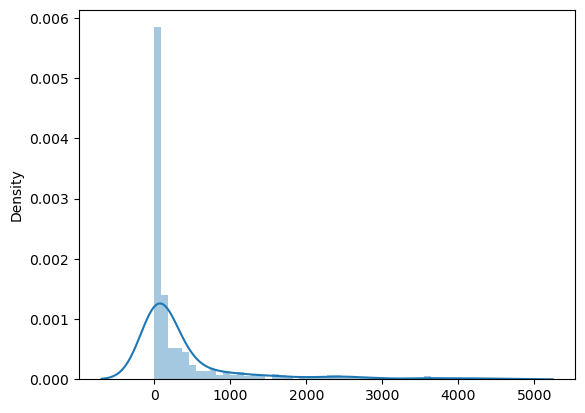

In [43]:
sns.distplot(runs)

In [44]:
# note that this is not really a Normal Distribution
# Most the batsman score very less runs, whereas there are a few batsman who have scored high runs

In [47]:
# now we will sample from this data randomly
# choose 50 samples from 461 points and repeat this process 1000 times
np.random.choice(runs, size=50)

array([  95,   62,    1,    3,    2,    0,    4,   35,   20,  198,  187,
        439, 2489,   34, 2334,  342,  241,    1,   24, 2728,    8,   42,
         88,   40,   10, 2354,    3,   88, 1993,   33,    8,  340,  127,
        103, 1808,    4,    9,  608,  124, 1262,    2,  672,   11,   95,
         91,    3,    7,  373, 1713, 3651], dtype=int64)

In [61]:
m = 1000
n = 50
# creating an empty array
new = []

for i in range(m):
    x = np.random.choice(runs, size=n)
    new.append(x.mean())
# now we have a randomly selected array with values from the deliveries dataset
# convert the array to numpy array
new = np.array(new)

<Axes: ylabel='Count'>

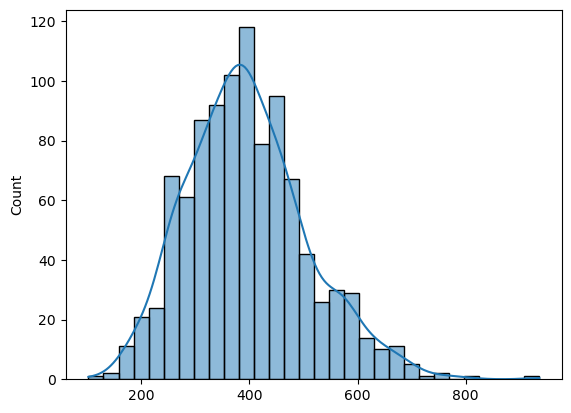

In [62]:
# if we plot new with histplot
sns.histplot(new, kde=True)
# now this is a Normal Distributions

In [68]:
# further, the means od runs(original array) and new(sampled array) should be very close or same
print(runs.mean())
print(new.mean())

398.9783080260304
395.81318


In [71]:
# variance(runs)/50 and varinace(new) should be very close
print(new.var())
print(runs.var()/50)
# the same is true for STD, replace 50 with root(50)

12447.2908178876
12311.660901652069
